In [2]:
!gpustat

blade                Tue Jul 20 11:35:01 2021  455.45.01
[0] RTX A6000        | 83'C,  99 % | 46482 / 48685 MB | sifanw(46479M)
[1] RTX A6000        | 82'C,  99 % | 44514 / 48685 MB | sifanw(44511M)
[2] RTX A6000        | 61'C,   0 % | 45798 / 48685 MB |
[3] RTX A6000        | 29'C,   0 % | 46244 / 48685 MB | shyamss(46237M)
[4] RTX A6000        | 32'C,   0 % | 44518 / 48685 MB | shyamss(44515M)
[5] RTX A6000        | 29'C,   0 % |     1 / 48685 MB |
[6] RTX A6000        | 67'C,  78 % | 44452 / 48685 MB | gkissas(44449M)
[7] RTX A6000        | 83'C,  74 % | 44886 / 48685 MB | icraw(44883M)


In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [4]:
import numpy as onp
from jax import numpy as np
from jax import grad, jit, vmap
from jax.nn import sigmoid, relu, leaky_relu, elu
from matplotlib import pyplot as plt

In [5]:
!ls

 Archive
 flat_paramses_1_12_12.npy
'helmholtz_test_errors_1_12_12_256_[ 2  4  6  8 10 12 14 16 18 20 22 24].npy'
'helmholtz_test_errors_1_12_12_256_[26, 28, 30, 32, 34, 36].npy'
 loss_1_12_12_depth_26.pdf
 loss_1_12_12_depth_28.pdf
 loss_1_12_12_depth_30.pdf
 loss_1_12_12_depth_32.pdf
 loss_1_12_12_depth_34.pdf
 loss_1_12_12_depth_36.pdf
 loss_1_12_12.npy
 losses_1_12_12_depth_26.pdf
 losses_1_12_12_depth_28.pdf
 losses_1_12_12_depth_30.pdf
 losses_1_12_12_depth_32.pdf
 losses_1_12_12_depth_34.pdf
 losses_1_12_12_depth_36.pdf
 losses_1_12_12.npy
 norm_1_12_12_depth_26.pdf
 norm_1_12_12_depth_28.pdf
 norm_1_12_12_depth_30.pdf
 norm_1_12_12_depth_32.pdf
 norm_1_12_12_depth_34.pdf
 norm_1_12_12_depth_36.pdf
 normal_1_12_12_depth_26.pdf
 normal_1_12_12_depth_28.pdf
 normal_1_12_12_depth_30.pdf
 normal_1_12_12_depth_32.pdf
 normal_1_12_12_depth_34.pdf
 normal_1_12_12_depth_36.pdf
 plot.ipynb
 scaled_1_12_12_depth_26.pdf
 scaled_1_12_12_depth_28.pdf
 scaled_1_12_12_depth_30.pdf
 scaled_1_12

In [6]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16,
                        'lines.linewidth': 2,
                        'axes.labelsize': 10,
                        'axes.titlesize': 16,
                        'xtick.labelsize': 10,
                        'ytick.labelsize': 10,
                        'legend.fontsize': 10,
                        'axes.linewidth': 2})

In [8]:
test_errors = np.concatenate((np.load('helmholtz_test_errors_1_12_12_256_[ 2  4  6  8 10 12 14 16 18 20 22 24].npy'), \
                             np.load('helmholtz_test_errors_1_12_12_256_[26, 28, 30, 32, 34, 36].npy')))
depths = 2 * np.arange(1, 19)

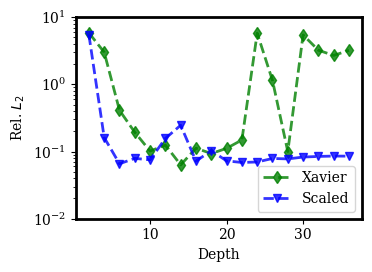

In [17]:
plt.figure(figsize = (4,3))
plt.plot(depths, test_errors[:,0], label = 'Xavier', marker = 'd', linestyle = '--', alpha = 0.8, color = 'g')
plt.plot(depths, test_errors[:,1], label = 'Scaled', marker = 'v', linestyle = '--', alpha = 0.8, color = 'b')
plt.xlabel('Depth')
plt.ylabel(r'Rel. $L_2$')
plt.yscale('log')
plt.ylim([1e-2, 10])
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig('256_test_errors.pdf', dpi = 200)
plt.show()
plt.close()